# Lorenz System Datasets as $\rho$ changes (paper version)

$$
\begin{split}
\dot{x} &= \sigma(y-x)\\
\dot{y} &= x(\rho-z)-y\\
\dot{z} &= xy - \beta z
\end{split}
$$

## $\sigma = 10, \beta = \frac{8}{3}$

### dataset visualization 

In [4]:
# Import libraries
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt      
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [5]:
#######################################################################
# L I S T   O F   R H O   V A L U E S
#######################################################################
rho_list  = np.array([166,166.1,166.3,167])

rho_list  = np.sort(rho_list)

len_rho_list = len(rho_list)

print(len_rho_list)

4


=====     0) : Lorenz rho = 166.000
=====     1) : Lorenz rho = 166.100
=====     2) : Lorenz rho = 166.300
=====     3) : Lorenz rho = 167.000


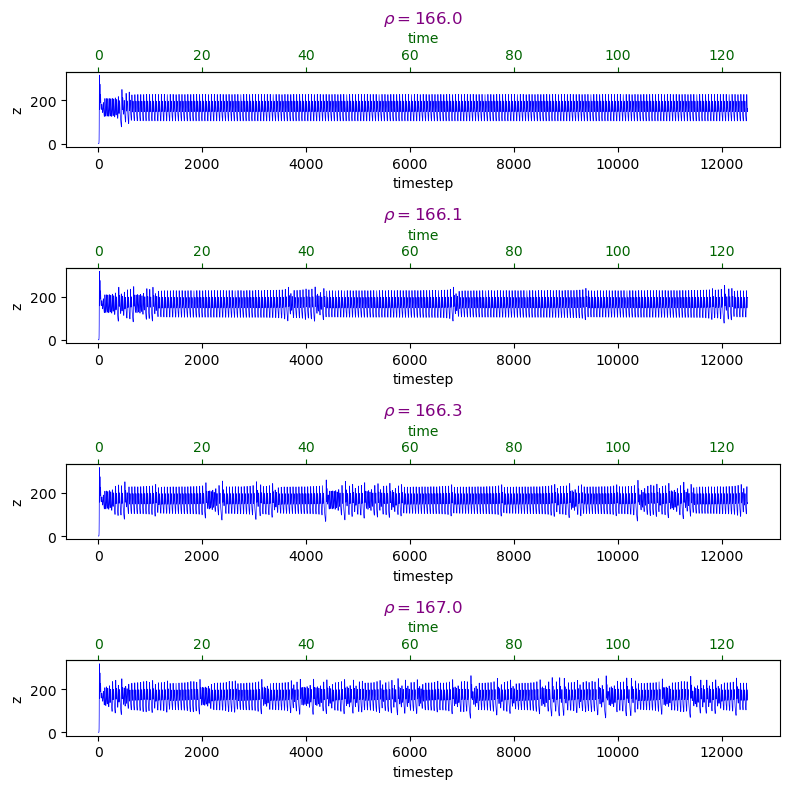

In [6]:
#######################################################################
# M A I N   L O O P 
#######################################################################
fig, axs = plt.subplots(len(rho_list), 1, figsize=(8, 8))  
dt = 0.01

for s in range(len(rho_list)):
    rho_Lorenz  = rho_list[s]
    # read dataset
    str_rho_Lorenz = (f'{rho_Lorenz:07.3f}').replace(".", "_")
    print("===== ",f'{s:>4d}) : Lorenz rho = {rho_Lorenz:>7.3f}')
    X = np.loadtxt('dataset2/Lorenz_Dataset_'+str(str_rho_Lorenz)+'.csv',delimiter=";")
    n_timesteps = len(X)

    my_title  = "$\\rho = $" + str(rho_Lorenz)
    step_from = 0
    step_to   = n_timesteps
    my_lw     = 0.5 # line thickness
    
    # Plot data on each subplot
    timesteps = [*range(step_from, step_to, 1)]

    # add a secondary scale
    ax = axs[s].secondary_xaxis('top', functions=(lambda x: dt * x, lambda x: x / dt), color = 'darkgreen')
    ax.set_xlabel('time')
    axs[s].set_title(my_title, color = 'purple')
    axs[s].plot(timesteps, X[step_from:step_to,2], label="z", color='blue',  lw=my_lw)
    axs[s].set_ylabel("z")
    
    # set label only on variable z
    axs[s].set_xlabel("timestep")

fig.tight_layout()

plt.savefig('Lorenz_system_intermittency_bursts.png',bbox_inches='tight')

plt.show()

plt.close(fig)

In [7]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 4.41e+00 s
